# Introduction to Scikit-learn

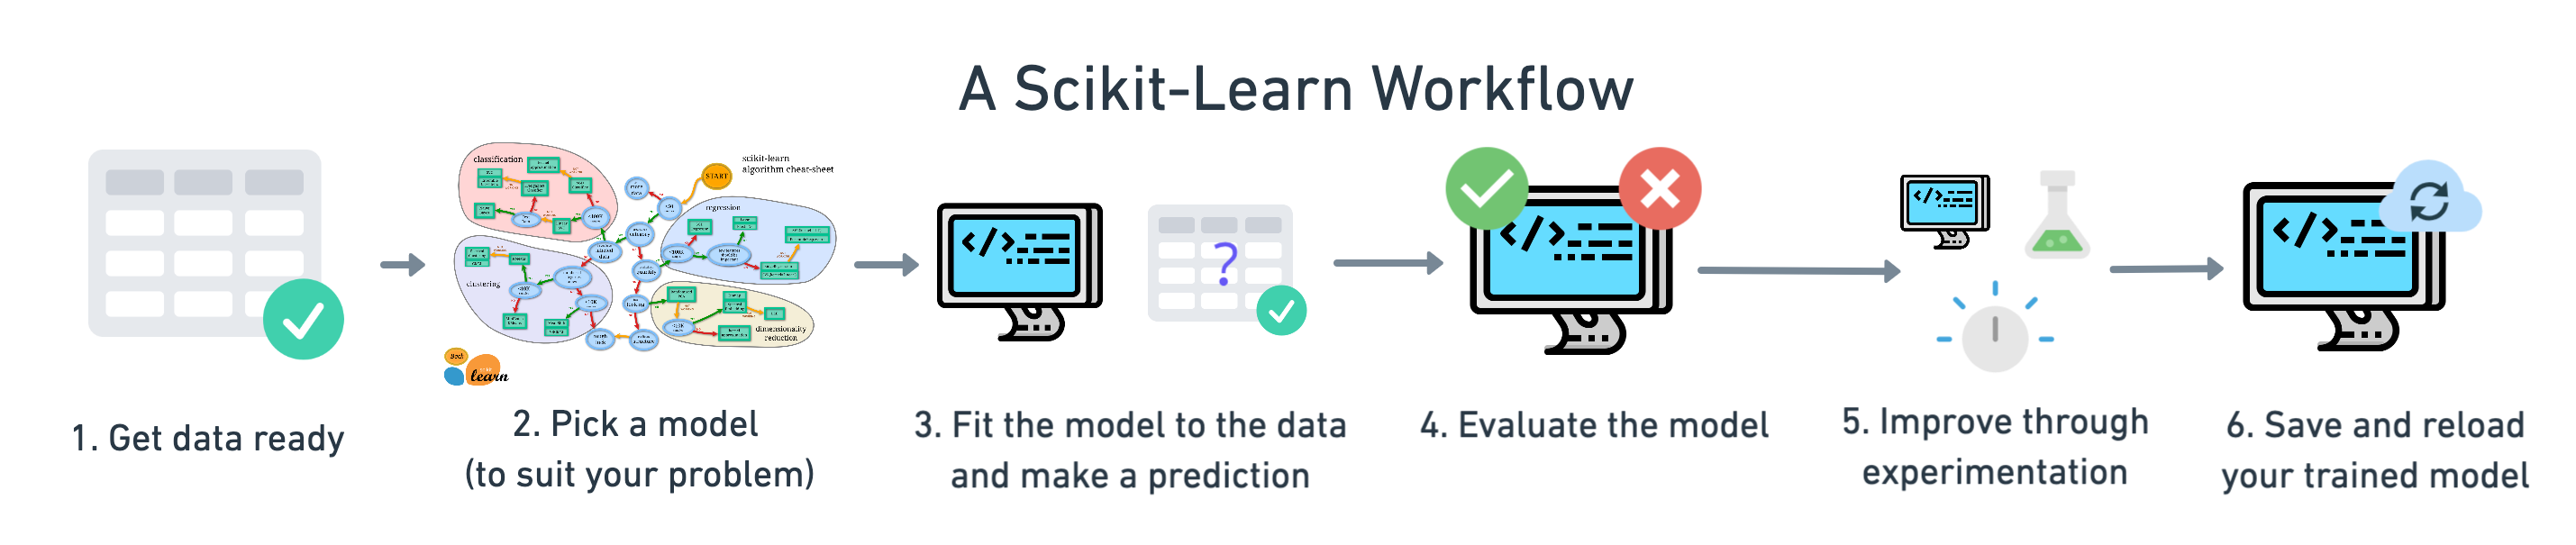

In [23]:
%matplotlib inline
from IPython.display import Image
Image('../resources/sklearn-workflow-title.png')

### 0. OVERVIEW end-to-end Scikit learn workflow

1. get data
2. choose algorithm
3. fit model
4. evaluating model
5. improve model
6. save and load
7. putting together

#### 1.Getting data ready

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dtf_heartdisease = pd.read_csv("../Matplotlib/heart-disease .csv")
dtf_heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Create X (features metrix)
X = dtf_heartdisease.drop("target", axis=1)

# Create y (labels)
y = dtf_heartdisease["target"]

#### 2.Choose the right model and hyperparameters

In [26]:
from sklearn.ensemble import RandomForestClassifier
model_clf = RandomForestClassifier(n_estimators=100)

# keep default hyperparameter
model_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 3. Fit the model/algorithm and use it to make predictions on our data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
model_clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# make a prediction
y_preds = model_clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [30]:
y_test

42     1
291    0
15     1
51     1
265    0
      ..
18     1
247    0
126    1
131    1
176    0
Name: target, Length: 61, dtype: int64

#### 4. Evaluate the model on the training data and test data

In [31]:
model_clf.score(X_train, y_train)

1.0

In [32]:
model_clf.score(X_test, y_test)

0.7704918032786885

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        21
           1       0.88      0.75      0.81        40

    accuracy                           0.77        61
   macro avg       0.76      0.78      0.76        61
weighted avg       0.80      0.77      0.78        61



In [34]:
confusion_matrix(y_test, y_preds)

array([[17,  4],
       [10, 30]], dtype=int64)

In [35]:
accuracy_score(y_test, y_preds)

0.7704918032786885

#### 5. Improve Model

In [36]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators........")
    model_clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy : {model_clf.score(X_test, y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators........
Model accuracy : 80.33%

Trying model with 20 estimators........
Model accuracy : 80.33%

Trying model with 30 estimators........
Model accuracy : 78.69%

Trying model with 40 estimators........
Model accuracy : 78.69%

Trying model with 50 estimators........
Model accuracy : 77.05%

Trying model with 60 estimators........
Model accuracy : 77.05%

Trying model with 70 estimators........
Model accuracy : 80.33%

Trying model with 80 estimators........
Model accuracy : 81.97%

Trying model with 90 estimators........
Model accuracy : 80.33%



#### 6. Save a model and load it

In [37]:
import pickle

pickle.dump(model_clf, open("random_forst_model_1.pkl", "wb"))

In [38]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

### 1. Getting the data ready
3 main things
- Split data : into features and labels (usally 'X' & 'y')
- Filling : (imputing) or disregarding missing values
- Feature encoding : Converting non-numerical values to numerical values

In [39]:
dtf_heartdisease = pd.read_csv("../Matplotlib/heart-disease .csv")
dtf_heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
X = dtf_heartdisease.drop("target", axis=1)
y = dtf_heartdisease["target"]

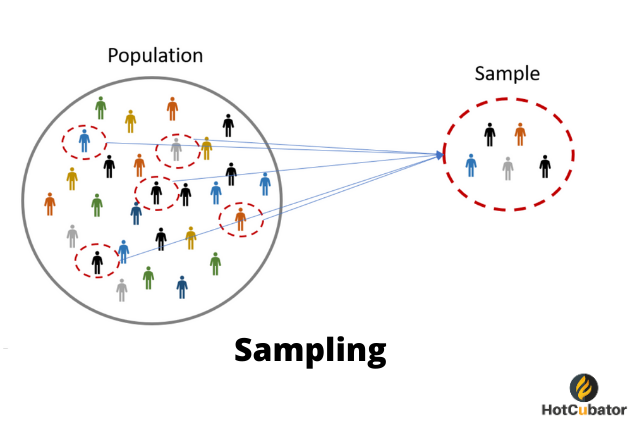

In [55]:
%matplotlib inline
from IPython.display import Image
Image('../resources/Copy-of-Social-Business-1.png')

Sampling Algorithm : Train_Test_Split และ StratifiedShuffleSplit ใน Scikit-Learn ต่างกันอย่างไร ??
- https://apannawit.medium.com/sampling-algorithm-train-test-split-%E0%B9%81%E0%B8%A5%E0%B8%B0-stratifiedshufflesplit-%E0%B9%83%E0%B8%99-scikit-learn-%E0%B8%95%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AD%E0%B8%A2%E0%B9%88%E0%B8%B2%E0%B8%87%E0%B9%84%E0%B8%A3-2c31cdee2463
1. Random sampling : train_test_split
การ sampling แบบนี้ก็คือการสุ่ม 100 % จาก population
โดยแต่ละ member ของ population มีโอกาสเท่ากันที่จะถูกสุ่มเลือกออกมา
หากเทียบเป็นคำสั่งใน Scikit-Learn ก็จะเป็นคำสั่ง train_test_split ที่เราคุ้นชินนั่นเอง สมมุติค่าให้ test size = 0.2 ก็คือการที่เราสุ่มเลือกตัวอย่างที่จะเป็น train ออกมา 80 % จาก Raw data ทั้งหมดของเรานั่นเอง ปัญหาคืออาจเกิดการ sampling bias หากมีสัดส่วนหนึ่งมากกว่าสัดส่วนอื่นมาก ๆ
2. Stratified sampling : StratifiedShuffleSplit
การ sampling แบบนี้ก็จะเป็นการแก้ปัญหาในส่วนของด้านบน จะทำให้ได้ sample ที่มีการกระจายตัวคล้ายกับของ population นั่นเอง โดย population จะถูกแบ่งเป็น homogeneous subgroup ที่เรียกว่า strata และจำนวน instances ที่เหมาะสมจะถูกเลือกออกมาจากแต่ละ stratum เพื่อให้ได้สัดส่วนการกระจายตัวคล้ายกันกับของ population นั่นเอง

In [56]:
# Split the data into traning and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((760, 4), (190, 4), (760,), (190,))

DATA Science quick tips : Clean data -> Transform data -> Reduce data

#### 1.1. Make sure it all numerical

In [57]:
dtf_carsales = pd.read_csv("./resoruces/car-sales-extended.csv")
dtf_carsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [58]:
# Split into X/y
X = dtf_carsales.drop("Price", axis = 1)
y = dtf_carsales["Price"]

# Split into traning and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build ML Model -> RandomForestRegressor predict number
from sklearn.ensemble import RandomForestRegressor
model_Regressor = RandomForestRegressor()
model_Regressor.fit(X_train, y_train)
model_Regressor.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

- [One-Hot Encoding](https://lengyi.medium.com/one-hot-encoding-737c66e5b1bd#:~:text=One%2DHot%20encoding%20%E0%B8%84%E0%B8%B7%E0%B8%AD%E0%B8%81%E0%B8%B2%E0%B8%A3,%E0%B8%84%E0%B9%88%E0%B8%B2%200%20%E0%B8%AB%E0%B8%A3%E0%B8%B7%E0%B8%AD%201%20%E0%B9%80%E0%B8%97%E0%B9%88%E0%B8%B2%E0%B8%99%E0%B8%B1%E0%B9%89%E0%B8%99) สร้างตัวแปร Dummies สำหรับ Classification โดย model One-Hot encoding คือการทำข้อมูลที่ถูกเก็บในลักษณะ Categorical ทั้งในลักษณะที่มีลำดับ (Ordinal number) และไม่มีลำดับ (Nominal number) เปลี่ยนให้อยู่ในรูปแบบของ Binary values ที่มีค่า 0 หรือ 1 เท่านั้น



In [ ]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_feats = ["Make", "Colour", "Doors"] #categories features
one_hot = OneHotEncoder()
#transformer
tfm = ColumnTransformer([("one_hot", one_hot, cat_feats)], remainder="passthrough")

tfm_X = tfm.fit_transform(X)
pd.DataFrame(tfm_X)

# also can use
#dummies = pd.get_dummies(dtf_carsales[["Make", "Colour", "Doors"]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


Random seed
- https://marcuscode.com/lang/python/random-numbers-in-python
- ฟังก์ชันสุ่มตัวเลขพื้นฐานในภาษา Python ใช้อัลกอริทึม Pseudorandom number generator (PRNG) เป็นวิธีการสุ่มหลัก ซึ่งอัลกอริทึม PRNG นั้นใช้สมการทางคณิตศาสตร์สำหรับสร้างลำดับของตัวเลขในการสุ่ม และมันใช้ Random seed ในการกำหนดการทำงาน

Random seed คือตัวเลขที่ใช้กำหนดการทำงานของตัวสุ่มตัวเลข โดยปกติแล้วเราจะต้องกำหนด Random seed ให้กับตัวสุ่มก่อนเสมอ อย่างไรก็ตามในภาษา Python ได้ทำขั้นตอนนี้ให้อัติโนมัติ โดยใช้ค่าใช้ที่เปลี่ยนไปตลอดเวลา เช่น ค่า Timestamp ปัจจุบันของระบบ ดังนั้นเราไม่จำเป็นต้องกำหนดมันด้วยตัวเอง

In [ ]:
# Split into traning and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(tfm_X, y, test_size=0.2)

# Build ML Model -> RandomForestRegressor predict number
#from sklearn.ensemble import RandomForestRegressor
model_Regressor = RandomForestRegressor()
model_Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model_Regressor.score(X_test, y_test)

0.3235867221569877

#### 1.2. What if there were missing values
- Imputation : Fill them with some values
- Remove the samples with missing data together

In [ ]:
dtf_carsales_missing_data = pd.read_csv("./resoruces/car-sales-extended-missing-data.csv")
# Show missing data
dtf_carsales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Split into X/y
X = dtf_carsales_missing_data.drop("Price", axis = 1)
y = dtf_carsales_missing_data["Price"]

In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values.

In [ ]:
# Let's try and convert our data to numbers
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_feats = ["Make", "Colour", "Doors"] #categories features
one_hot = OneHotEncoder()
tfm_missing = ColumnTransformer([("one_hot", one_hot, cat_feats)], remainder="passthrough")

tfm_X_missing = tfm_missing.fit_transform(X)
pd.DataFrame(tfm_X_missing)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# Split into traning and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(tfm_X_missing, y, test_size=0.2)

# Build ML Model -> RandomForestRegressor predict number
#from sklearn.ensemble import RandomForestRegressor
model_Regressor = RandomForestRegressor()
model_Regressor.fit(X_train, y_train)
model_Regressor.score(X_test, y_test)

0.3235867221569877

#### Option 1 : Fill missing values with Pandas

In [ ]:
# Fill the "Make" col
dtf_carsales_missing_data["Make"].fillna("missing", inplace = True)
# Fill the "Colour" col
dtf_carsales_missing_data["Colour"].fillna("missing", inplace = True)
# Fill the Odometer (KM) col
dtf_carsales_missing_data["Odometer (KM)"].fillna(dtf_carsales_missing_data["Odometer (KM)"].mean(),
                                                  inplace = True)
# Fill the Doors col
dtf_carsales_missing_data["Doors"].fillna(4, inplace = True)

# Split into X/y
X = dtf_carsales_missing_data.drop("Price", axis = 1)
y = dtf_carsales_missing_data["Price"]

# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_feats = ["Make", "Colour", "Doors"] #categories features
one_hot = OneHotEncoder()
tfm = ColumnTransformer([("one_hot", one_hot, cat_feats)], remainder="passthrough")

tfm_X = tfm.fit_transform(dtf_carsales_missing_data)
pd.DataFrame(tfm_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


#### Option 2 Fill missing values with Scikit-learn

The main takeaways:

Split your data first (into train/test), always keep your training & test data separate

Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

Don't use data from the future (test set) to fill data from the past (training set)

In [ ]:
dtf_carsales_missing_data = pd.read_csv("./resoruces/car-sales-extended-missing-data.csv")

# Drop the rows with missing in the Price column
dtf_carsales_missing_data.dropna(subset=["Price"], inplace=True)

# Split into X&y
X = dtf_carsales_missing_data.drop("Price", axis = 1)
y = dtf_carsales_missing_data["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Toyota', 'White', 4, 134862.0],
       ['Nissan', 'White', 4, 40598.0],
       ['BMW', 'Blue', 3, 142189.0],
       ...,
       ['Toyota', 'Blue', 4, 63501.0],
       ['Nissan', 'White', 4, 82429.0],
       ['Toyota', 'White', 4, 119439.0]], dtype=object)

In [ ]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

In [ ]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

In [ ]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

In [ ]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(dtf_carsales_missing_data)

### 2. Choosing the right estimator/algorithm for PROBLEMS
Notes :

* Sklearn refers to ML models, Alogrithm as estimators
* Classification problems -> predict a category (heart disease or not)
    * Sometimes you'll see 'clf' (short for classifier) used as a classification estimator
* Regression problems -> predicting a number (selling price of a car)

Note : Structred data -> ensemble method / Unstructured data -> deep leaning/transfer learning

#### 2.1. Picking a ML model for a Regression problems
RandomForrestRegressor which is based on what we call a Decision Tree algorithm

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
# gets parameter from object
housing = fetch_california_housing()
# gets downloaded as dictionary
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dtf_housing = pd.DataFrame(housing["data"], columns=housing["feature_names"])
dtf_housing["target"] = pd.Series(housing["target"])
dtf_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


##### ElasticNet

In [ ]:
# Import algorithm / estimator
from sklearn.linear_model import ElasticNet

# Set up random seed -> Setting a random seed in machine learning ensures that the results of your model training are consistent and reproducible across different runs, like using the same recipe to bake the same batch of cookies every time.
np.random.seed(42)

# Create the data
X = dtf_housing.drop("target", axis = 1)
y = dtf_housing["target"] # median house price in $1,000,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the traning set)
model = ElasticNet()
model.fit(X_train, y_train)

# Check the score of the model (ont the test set)
# score return The coefficient of determination (R²) -> a number between 0 and 1 that measures how well a statistical model predicts an outcome. You can interpret the R² as the proportion of variation in the dependent variable that is predicted by the statistical model.
model.score(X_test, y_test)

0.41655189098028245

##### Ridge Regression

In [ ]:
# Import algorithm / estimator
from sklearn.linear_model import Ridge

# Set up random seed -> Setting a random seed in machine learning ensures that the results of your model training are consistent and reproducible across different runs, like using the same recipe to bake the same batch of cookies every time.
np.random.seed(42)

# Create the data
X = dtf_housing.drop("target", axis = 1)
y = dtf_housing["target"] # median house price in $1,000,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the model (on the traning set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (ont the test set)
# score return The coefficient of determination (R²) -> a number between 0 and 1 that measures how well a statistical model predicts an outcome. You can interpret the R² as the proportion of variation in the dependent variable that is predicted by the statistical model.
model.score(X_test, y_test)

0.5758549611440127

##### Random Forest Tree

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = dtf_housing.drop("target", axis=1)
y = dtf_housing["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.8065734772187598

#### 2.2. Picking a ML model for a classification problem

In [ ]:
heart_disease = pd.read_csv("./resoruces/heart-disease.csv")

LinearSVC
- to make it precisely, it need to declare that dual = auto. it will find the best class from X_train and output to y_test

In [ ]:
# import LinearSVC
from sklearn.svm import LinearSVC
import numpy as np

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=100, # iterations on the data, 1000 is the default
                dual="auto") # dual="auto" chooses best parameters for the model automatically
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8688524590163934

In [ ]:
heart_disease.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

Randomforest Classifier SVC Essemble Classifier

In [ ]:
# import Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

### 3. Fit the model/algorithm and use it to make predictions

X = features, features var, data
y = lebels, targets, target var

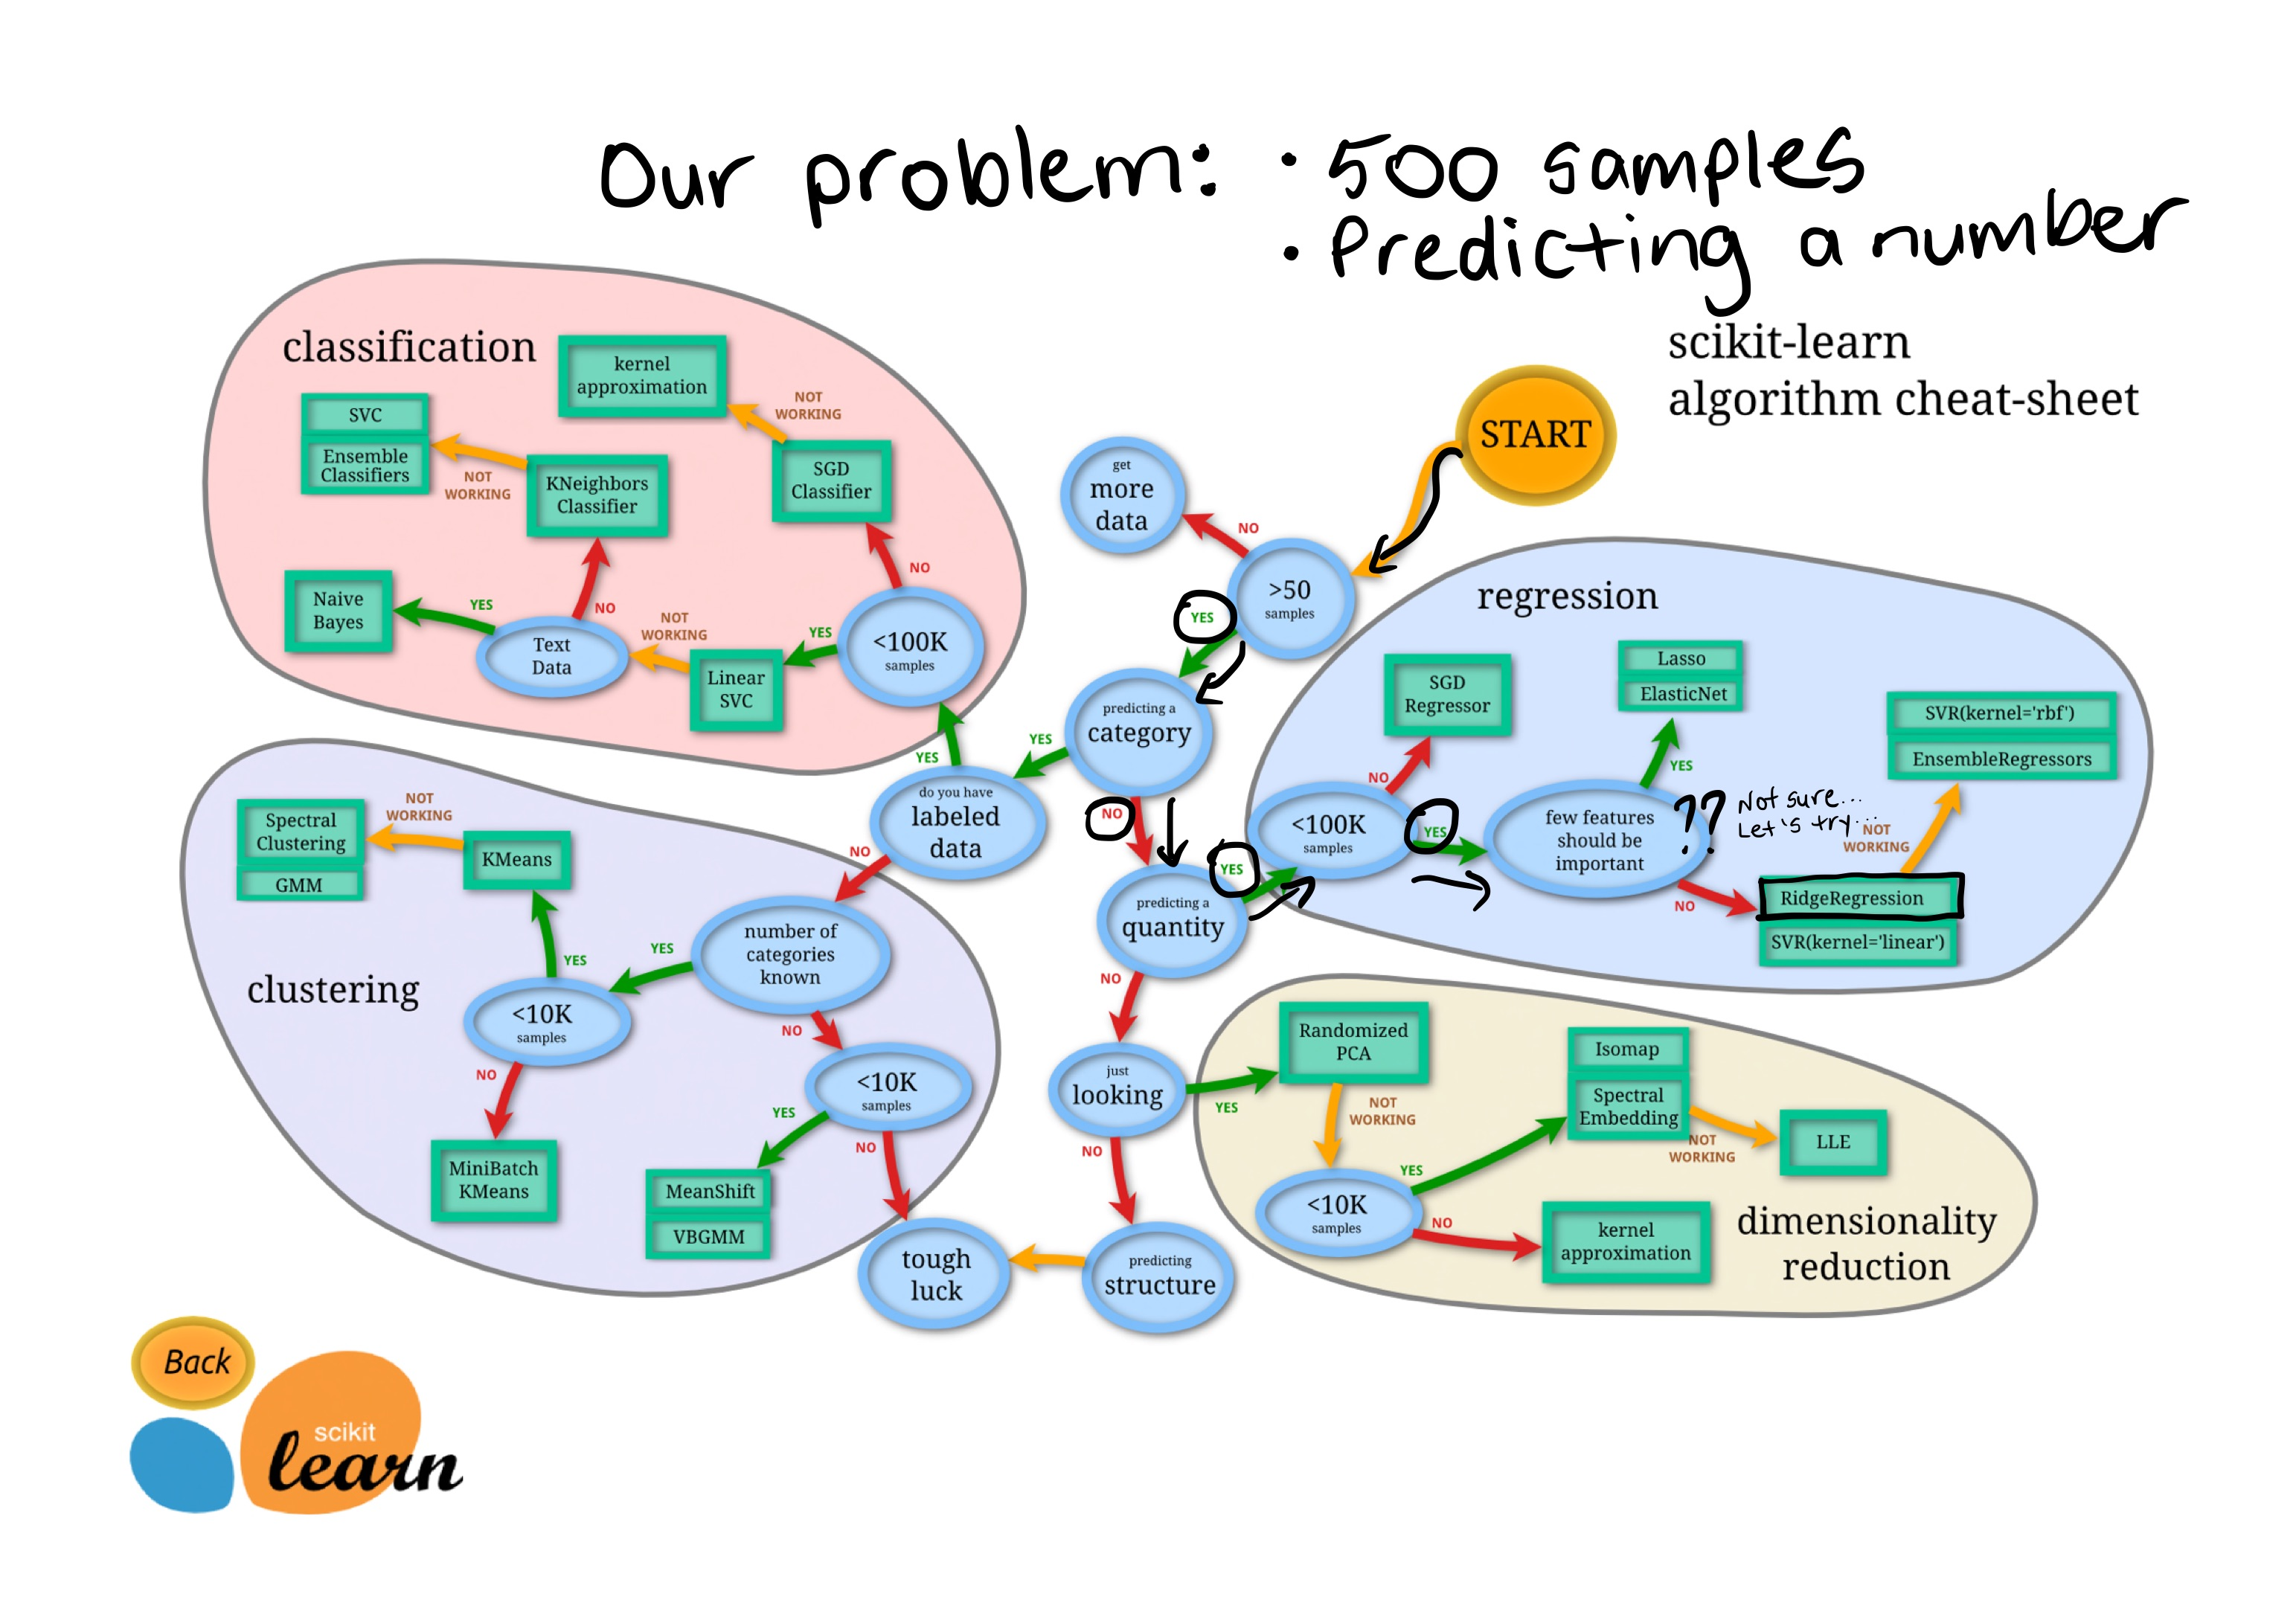

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('../resources/sklearn-ml-map-cheatsheet-boston-housing-ridge.png')

#### 3.1. Fitting the model to the data

In [ ]:
# import Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier

heart_disease = pd.read_csv("./resoruces/heart-disease.csv")

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data - >training the ML model (use the pattern model has learned)
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### 3.2. Make predictions using a ML model
2 ways to make predictions : 
- predict()
- predict_proba()

##### predict()
predict() is used to predict the actual class (in your case one of 0, 1, or 2). FOR EXAMPLE predict() would output class 0 since the class probability for 0 is 0.6.

In [ ]:
# returns an array of predicted labels. Each element in this array corresponds to the predicted label for the corresponding sample in X_test.
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# converts the true labels (y_test) into a NumPy array.
# used to create a NumPy array from the true labels. This is done for consistency when comparing it to the predicted labels obtained from the model.
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

clf.predict() -> use for prediction
/ np.array(y_test) -> use for test label

In [ ]:
# Compare predictions to truth table labels to evaluaate the models
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [ ]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
# another method to get the accuracy score instaed using the clf.score()

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

##### predict_proba()
return probabilities of a classification label, used to predict the class probabilities

[0.6, 0.2, 0.2] is the output of predict_proba that simply denotes that the class probability for classes 0, 1, and 2 are 0.6, 0.2, and 0.2 respectively.

In [ ]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


##### Using predict() for regression models

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
# gets parameter from object
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dtf_housing = pd.DataFrame(housing["data"], columns=housing["feature_names"])
dtf_housing["target"] = pd.Series(housing["target"])
dtf_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = dtf_housing.drop("target", axis=1)
y = dtf_housing["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()

# Fitting the model
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

y_preds[:10]

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
# model.score(X_test, y_test)

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
len(y_test)

4128

In [ ]:
len(y_preds)

4128

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32659871732073664

### 4. Evaluating a ML model

3 ways to evaluating
- Estimator's built-in 'score()' method
- The 'scoring' parameter
- Problem-specific metric functions
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

#### 4.1. Evaluating a model with the score method

In [ ]:
heart_disease = pd.read_csv("./resoruces/heart-disease.csv")
from sklearn.ensemble import RandomForestClassifier

# Setting seed
np.random.seed(42)

# Split data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

n_estimators (ค่าตั้งต้น = 100) คือ จำนวน Decision Tree ที่จะใช้ใน Random Forest โดยปกติแล้วยิ่งจำนวนสูงยิ่งส่งผลให้ประสิทธิภาพของโมเดลดียิ่งขึ้น แต่จะทำให้เวลาที่ใช้ในการสร้างโมเดลนานขึ้นเช่นกัน

In [ ]:
# Check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
clf.score(X_train, y_train)

1.0

Try to use on regression model

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = dtf_housing.drop("target", axis=1)
y = dtf_housing["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=2)

# Fitting the model
model.fit(X_train, y_train)

# Make prediction
y_preds = model.predict(X_test)

# Check the score of the model (on the test set)
# The default score metirc of regression aglorithms is R^2
model.score(X_test, y_test)

0.7000978702214974

In [ ]:
dtf_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 4.2. Scoring parameter

In [ ]:
# Evaluate a score by cross-validation.
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

heart_disease = pd.read_csv("./resoruces/heart-disease.csv")

# Setting seed
np.random.seed(42)

# Split data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 5-fold cross validation score
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [ ]:
# Compare single traning and 5-fold cross validation score
np.random.seed(42)
clf_single_score = clf.score(X_test, y_test)
clf_cross = np.mean(cross_val_score(clf, X, y, cv = 5))

clf_single_score, clf_cross

# Even the clf_cross have mean value less tham single score, but in the real world using cross validation is more precise

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Scoring parameter set to None by defualt
cross_val_score(clf, X, y, cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#### 4.2.1. Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

##### Accuracy

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = dtf_housing.drop("target", axis=1)
y = dtf_housing["target"]

# Institate and fit the model (on the training set)
model = RandomForestRegressor(n_estimators=2)

cross_val_score = cross_val_score(model, X, y, cv = 5)

In [ ]:
np.mean(cross_val_score) ## this is accuracy

0.48713454642026505

##### Area under ROC curve (Receiver Operating Characteristic) / AUC
https://datascihaeng.medium.com/evaluation-matrix-part2-a7d83aea6537

- AUC (Area under curve)
- ROC curve

ROC are a cmparison of a model's true positive rated (tpr) versus a model's false positive rate (fpr)

- True positive -> model predict 1 when truth is 1
- False positive -> model predict 1 when truth is 0
- True negative -> model predict 0 when truth is 0
- False negative -> model predict 0 when truth is 1

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classsifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.94, 0.06],
        [0.4 , 0.6 ],
        [0.46, 0.54],
        [0.87, 0.13],
        [0.19, 0.81],
        [0.16, 0.84],
        [0.34, 0.66],
        [0.96, 0.04],
        [0.96, 0.04],
        [0.54, 0.46]]),
 61)

In [ ]:
y_probs_positive = y_probs[:, 1]

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.10344828, 0.10344828,
       0.13793103, 0.13793103, 0.17241379, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
       0.37931034, 0.4137931 , 0.51724138, 0.55172414, 0.62068966,
       0.68965517, 0.79310345, 0.93103448, 1.        ])

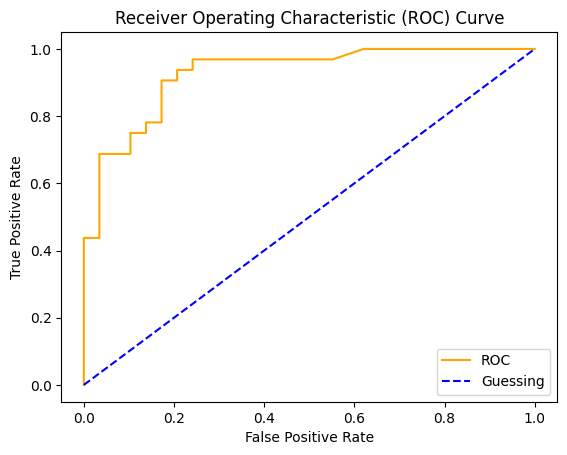

In [ ]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

# Create function to plot ROC curve by using fpr and tpr model
def ROC_plot (fpr, tpr):
    # Plot ROC curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "blue", linestyle = "--", label = "Guessing")
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_plot(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

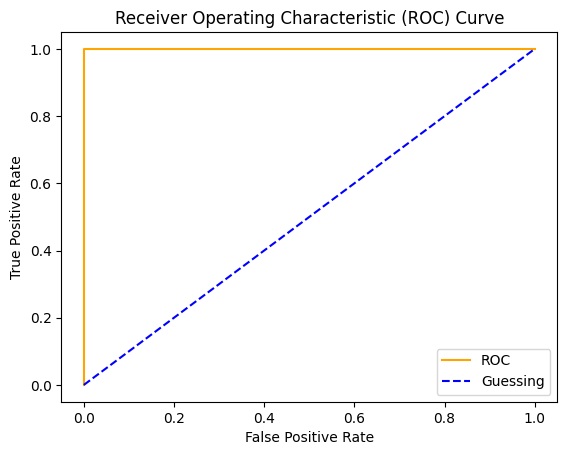

In [ ]:
# Plot perfect ROC curve and AUC score
fpr ,tpr, thresholds = roc_curve(y_test, y_test)
ROC_plot(fpr, tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

##### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [ ]:
# Visualizing confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, 
            rownames=['Actual Label'], 
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,24,5
1,5,27


Using Seaborn heatmap()

<Axes: >

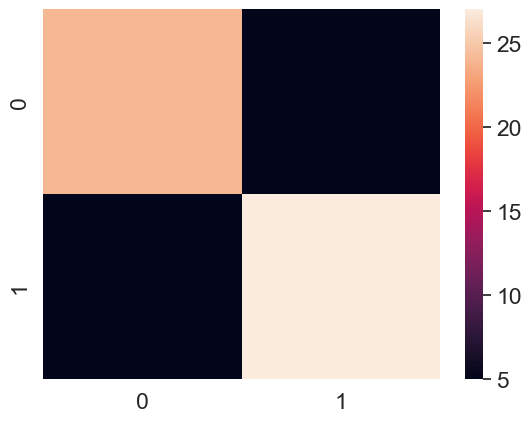

In [ ]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

Using Sklearn Metrics

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AveBedrms
- AveOccup
- AveRooms
- HouseAge
- Latitude
- ...
Feature names seen at fit time, yet now missing:
- age
- ca
- chol
- cp
- exang
- ...


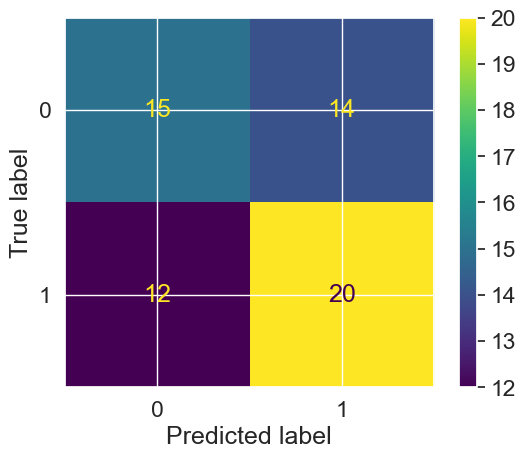

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.56      0.52      0.54        29
           1       0.59      0.62      0.61        32

    accuracy                           0.57        61
   macro avg       0.57      0.57      0.57        61
weighted avg       0.57      0.57      0.57        61



In [ ]:
# When precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # One positive case

disease_preds = np.zeros(10000) # Model predict every 0 case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: U

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### 4.2.2. Regression model evaluation metrics
Model evaluation -<https://scikit-learn.org/stable/modules/model_evaluation.html
1. R^2 : coefficient of etermination
2. MAE (Mean absolute error)
3. MSE (Mean squared error)


R^2 : Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
# gets parameter from object
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were. Lower is better.

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [ ]:
# Let's see how its worked
df = pd.DataFrame(data = {"actual values" : y_test,
                  "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual value,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [ ]:
# MAE using formulas and differences 
np.abs(df["differences"]).mean()

0.32659871732073664

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors). Lower is better.

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_true=y_test,
                         y_pred=y_preds)
mse

0.2534678520824551

In [ ]:
df = pd.DataFrame(data = {"actual values" : y_test,
                  "predicted values" : y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df["sqaure_difference"] = np.square(df["differences"])
df.head(10)

,actual values,predicted values,differences,sqaure_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.652530,0.065530,0.004294
7113,1.98200,2.343230,0.361230,0.130487
7668,1.57500,1.661820,0.086820,0.007538
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [ ]:
# How to calculate MSE by hand
df["sqaure_difference"].mean()

0.2534678520824551

In [ ]:
df_large_error = df.copy()
df_large_error.iloc[1:100]["squaure_difference"] = 20

C:\Users\User\AppData\Local\Temp\ipykernel_13444\837599285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_error.iloc[1:100]["squaure_difference"] = 20


In [ ]:
df_large_error.head()

,actual values,predicted values,differences,sqaure_difference
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


#### 4.2.3. 'Scoring' parameter
https://scikit-learn.org/stable/modules/model_evaluation.html

##### Classification Scoring parameter

scoring = None (withis default)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("./resoruces/heart-disease.csv")

np.random.seed(42)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
# Turn to percentage
print(f"{np.mean(cv_acc)*100:.2f}%")

82.48%


scoring = "accuracy"

In [ ]:
np.random.seed(42)

cv_acc = cross_val_score(estimator=clf, X=X, y=y, cv=5, scoring="accuracy")
# Turn to percentage
print(f"{np.mean(cv_acc)*100:.2f}%")

82.48%


scoring = "precision"
- Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0

In [ ]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv = 5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
print(f"The cross validation precision is {np.mean(cv_precision)*100:.2f}%")

The cross validation precision is 83.30%


scoring = "recall"
- Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall 1.0

In [ ]:
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [ ]:
print(f"The cross validation recall is {np.mean(cv_recall)*100:.2f}%")

The cross validation recall is 84.24%


##### Regrassion problems Scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

r2

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [ ]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

Mean absolute error

In [ ]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4820330437306202

In [ ]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

Mean squared error

In [ ]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
np.mean(cv_mse)

-0.4577252089624541

In [ ]:
cv_mse

array([-0.50635276, -0.33007879, -0.53674407])

#### 4.3. Using different evaluation metrics
The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the 'scikitlearn.metrics module

Classification function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create X,y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train)

# Evaluate model
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


Regression metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, 
                              n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


### 5. Improve model
- First predictions = baseline predictions
- First model = baseline model

From a data perspective:
1. Receive more data
2. Improve our data

From a model perspective:
1. Using better model
2. Impove current model

Hyperparameters vs Parameters:
- Parameter = model find these patterns in data
- Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Random by using RandomSearchCV
3. Exhaustively with GridSeachCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1. Tuning parameters by hands
- Make 3 sets, training and test

Reading the [Scikit-Learn documentation for the Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), you'll find they suggest trying to change `n_estimators` (the number of trees in the forest) and `min_samples_split` (the minimum number of samples required to split an internal node).

And we're going to adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

We'll use the same code as before, except this time we'll create a training, validation and test split.

With the training set containing 70% of the data and the validation and test sets each containing 15%.

Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.


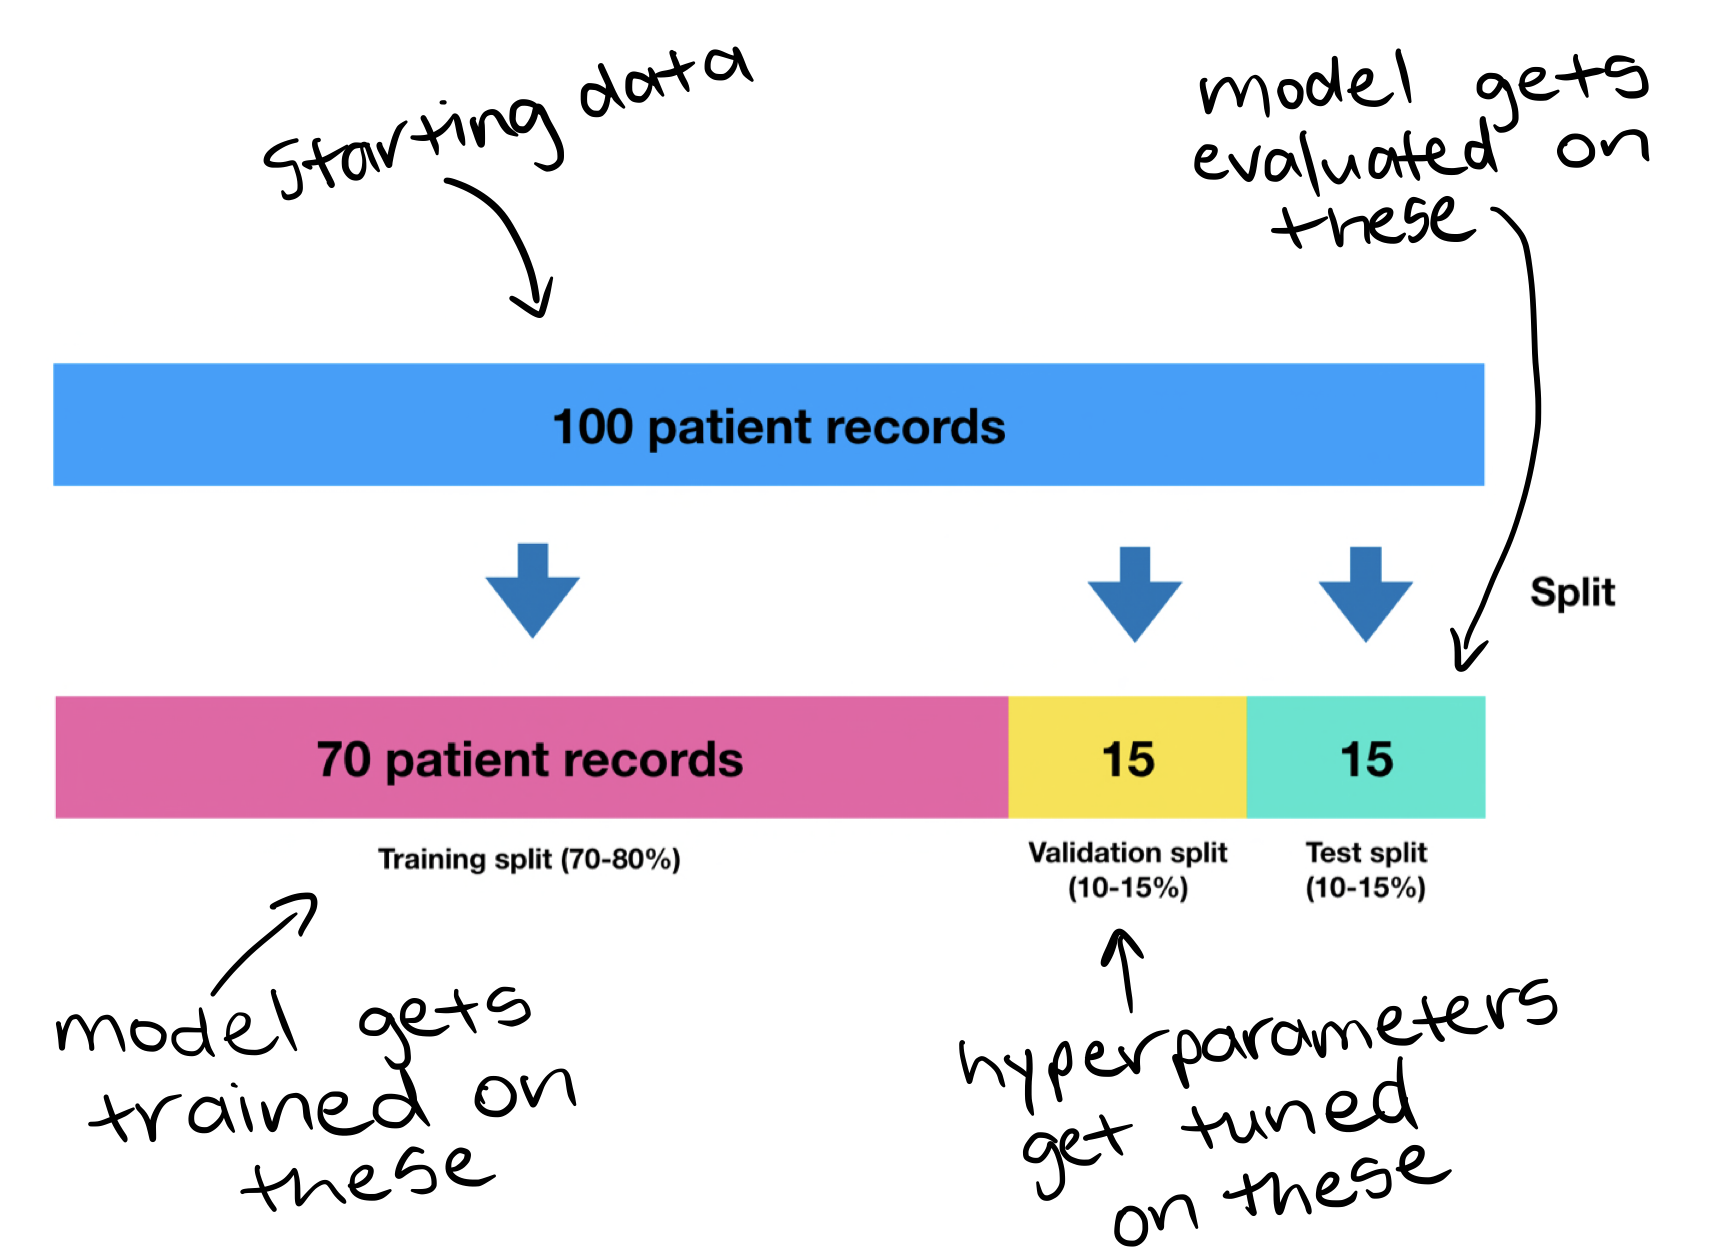

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('../resources/sklearn-train-valid-test-annotated.png')

Prepare function and data

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_predicts (y_true, y_preds):
    # Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
        "accuracy" :    round(accuracy, 2),
        "precision" :   round(precision, 2),
        "recall" :      round(recall, 2),
        "f1" :          round(f1, 2)
    }
    
    print(f"Acc : {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score : {f1:.2f}")
    
    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle data
# When frac=1, it means that you want to sample 100% of the rows. In other words, you are shuffling all the rows of the heart_disease DataFrame.
heart_disease_shuffle = heart_disease.sample(frac=1)

# Split data into X&y
X = heart_disease_shuffle.drop("target", axis = 1)
y = heart_disease_shuffle["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffle))
valid_split = round(train_split + (0.15 * len(heart_disease_shuffle)))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test , y_test = X[valid_split:], y[:valid_split]

- ex . Common model vs. Model with n_estimator = 100

In [ ]:
# Fit model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline preditions -> tune model on validation split
y_preds = clf.predict(X_valid)

# Evaluate the clssifier on validation set
baseline_metrics = evaluate_predicts(y_valid, y_preds)
baseline_metrics

Acc : 82.22%
Precision: 0.81
Recall : 0.88
F1 score : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
# Create a second classifier with different hyperparameters
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameter
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_metrics_2 = evaluate_predicts(y_valid, y_preds_2)
clf_metrics_2

Acc : 82.22%
Precision: 0.84
Recall : 0.84
F1 score : 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

"Max depth"

In [ ]:
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameter
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 3nd classifier
clf_metrics_3 = evaluate_predicts(y_valid, y_preds_2)
clf_metrics_3

Acc : 82.22%
Precision: 0.84
Recall : 0.84
F1 score : 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

#### 5.2. Tuning Hyperparameter with RandomizedSearchCV

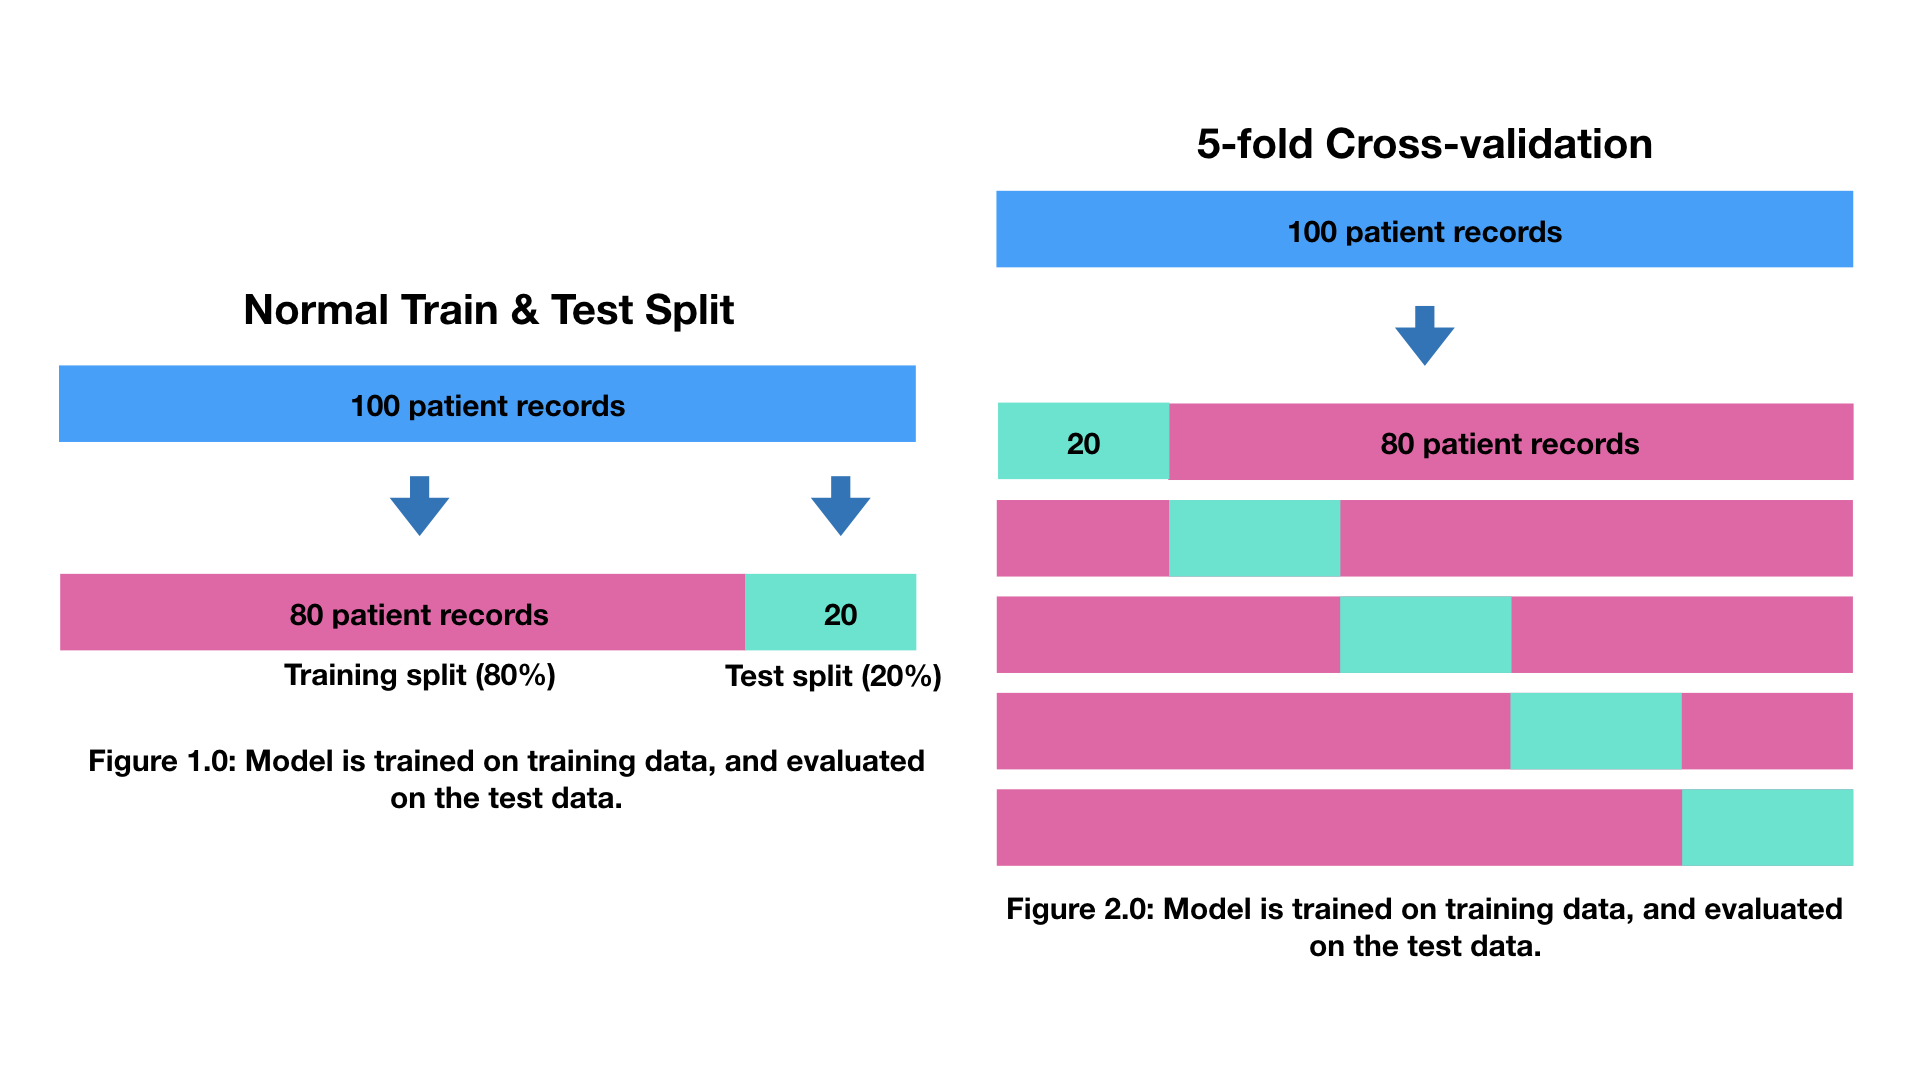

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('../resources/sklearn-cross-validation.png')

verbose -> Controls the verbosity: the higher, the more messages.
- if >1 : the computation time for each fold and parameter candidate is displayed;
- if >2 : the score is also displayed;
- if >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = { 
        "n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2,4,6],
        "min_samples_leaf" : [1,2,4]
    }

np.random.seed(42)

# Split into X&y
X = heart_disease_shuffle.drop("target", axis = 1)
y = heart_disease_shuffle["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
# n_jobs -> Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizeSearchCV
# n_iter -> number of model to try
rs_clf = RandomizedSearchCV(estimator = clf, 
                            param_distributions = grid,
                            n_iter = 10,
                            cv = 5,
                            verbose = 2)

# Fit the RandomizeSeachCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# Make predictions with the best parameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_predicts(y_test, rs_y_preds)

rs_metrics

Acc : 81.97%
Precision: 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

#### 5.3. Tuning Hyperparameter using GridSearchCV

In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

The best parameter is this term
{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}
 So we specific only few number in range of this sets

In [ ]:
grid_2 = { 
        "n_estimators" : [100, 200, 500],
        "max_depth" : [None],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [6],
        "min_samples_leaf" : [1,2]
    }

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Split into X&y
X = heart_disease_shuffle.drop("target", axis = 1)
y = heart_disease_shuffle["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier
# n_jobs -> Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
# Dont need to use n_iter
gs_clf = GridSearchCV(estimator = clf, 
                        param_grid = grid_2,
                        cv = 5,
                        verbose = 2)

# Fit the RandomizeSeachCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [ ]:
# Make predictions with the best parameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_predicts(y_test, gs_y_preds)

gs_metrics

Acc : 81.97%
Precision: 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

#### Compare models metrics

<Axes: >

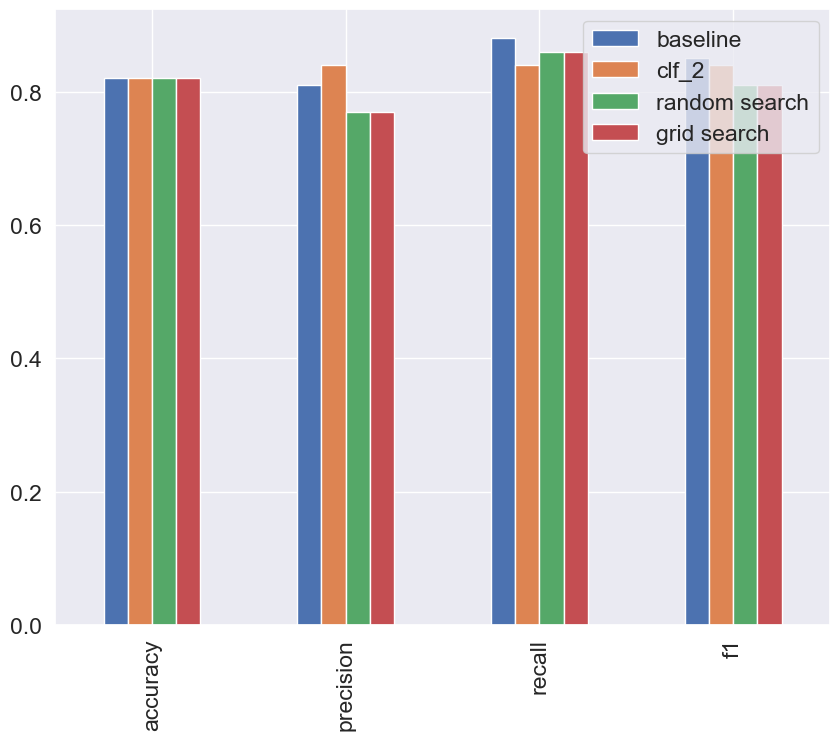

In [ ]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2" : clf_metrics_2,
                                "random search" : rs_metrics,
                                "grid search" : gs_metrics})
compare_metrics.plot.bar(figsize = (10,8))

 we compared the metric results of 3 different models. However, there was a small error.

As always, when comparing models, you should be careful to make sure they're compared on the same splits of data.

For example, let's say you have model_1 and model_2 which each differ slightly.

If you want to compare and evaluate their results, model_1 and model_2 should both be trained on the same data (e.g. X_train and y_train) and their predictions should each be made on the same data, for example:

model_1.fit(X_train, y_train) -> model_1.predict(X_test) -> model_1_preds

model_2.fit(X_train, y_train) -> model_2.predict(X_test) -> model_2_preds

Note the differences here being the two models and the 2 different sets of predictions which can be compared against each other.

The example in the video followed these steps but since the data was split differently for the baseline model, the comparisons aren't fully correct.

An example end-to-end notebook with the correct methodology has been created on Google Colab here:

https://colab.research.google.com/drive/1ISey96a5Ag6z2CvVZKVqTKNWRwZbZl0m

The short notebook compares 3 different models on the heart disease dataset.

A baseline RandomForestClassifier (all default parameters)

A RandomForestClassifier tuned with RandomizedSearchCV

A RandomForestClassifier tuned with GridSearchCV

The most important part is they all use the same data splits created using train_test_split() and np.random.seed(42).

### 6. Save and Load model
1. 'pickle' python module
2. 'joblib' module 

#### Pickle
- https://arnondora.in.th/how-to-pickle-and-unpickle-python/
- Pickle เป็น ชุดคำสั่งสำหรับการเก็บ Object (Model ที่เรา train) ลงเป็น Binary File และ สามารถเรียกกลับมาเป็น Object ได้อย่างง่ายดาย โดยผ่านคำสั่ง dump และ load ซึ่ง Pickle เองก็ไม่ต้องไปโหลดเพิ่มที่ไหน มันมากับ Standard Package อยู่แล้ว แต่ถ้าใครต้องทำงานกับข้อมูลขนาดใหญ่มาก ๆ Pickle อาจจะช้าไป ลองไปใช้ cPickle ดูจะเห็นเลยว่า ความเร็วสูงกว่าเยอะมาก เพราะมันเขียนจาก C Lang

แต่แน่นอนว่าเหรียญมันก็มีสองด้าน ในบางเคส เราอาจจะใช้ Pickle ไม่ได้ เช่น ข้อมูลเรามีขนาดใหญ่มาก และ ข้อมูลเราซับซ้อนมาก ๆ ถ้าเจอแบบนนั้น เราอาจจะต้องไปพิจารณาใช้ Format อื่นในการเก็บ

In [ ]:
import pickle

# Save an existing model to file -> pkl is pickle file and wb stand for write_binary
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [ ]:
# Load and saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', "rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_predicts(y_test, pickle_y_preds)

Acc : 81.97%
Precision: 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

#### Joblib
- https://medium.com/botnoi-classroom/%E0%B8%81%E0%B8%B2%E0%B8%A3-deploy-api-%E0%B9%80%E0%B8%9E%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%97%E0%B8%B3%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99-machine-learning-as-a-service-mlaas-b036c3b290a0#:~:text=Joblib%20%E0%B9%80%E0%B8%9B%E0%B9%87%E0%B8%99%E0%B8%AB%E0%B8%99%E0%B8%B6%E0%B9%88%E0%B8%87%E0%B9%83%E0%B8%99%20Libary,%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B8%A1%E0%B8%B5%E0%B8%81%E0%B8%B2%E0%B8%A3%20map%20memory
- Joblib เป็นหนึ่งใน Libary ของ Python ที่ทำหน้าที่ Save Model ให้เป็น Object เป็นหนึ่งใน External Lib ของ sklearn

- ข้อดี -> Replace Model ของ Algorithim อื่นๆ สำหรับ Joblib สามารถทำได้ง่ายกว่า Pickle ถ้ามีการเปลี่ยนแปลงอันเนื่องมากจากมีการ map memory
Joblib จะทำงานได้เร็วกว่า prickle เมื่อใช้งานกับข้อมูล Array ขนาดใหญ่
- ข้อเสีย -> ถ้า Model ไม่ได้ซับซ้อนหรือข้อมูล Array ไม่ใหญ่มาก Prickle จะทำงานได้เร็วกว่า


In [ ]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [ ]:
# Import a saved joblib model
load_joblib_model = load(filename="./gs_random_forest_model_1.joblib")

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = load_joblib_model.predict(X_test)
evaluate_predicts(y_test, joblib_y_preds)

Acc : 81.97%
Precision: 0.77
Recall : 0.86
F1 score : 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

### 7. Putting it all together
- https://lengyi.medium.com/scikit-learn-model-pipeline-4c155228f184
- Pipeline เข้ามามีบทบาทในส่วนที่เป็น Data preparation และ Data understanding อาจรวมถึง Model assembly บ้างเล็กน้อย ตัวอย่างเช่น ถ้าข้อมูลที่ได้รับมามี Missing value อยู่ ทำให้ไม่สามารนำข้อมูลนี้มาใช้งานได้ทันที ต้องมีการจัดการค่า Missing เหล่านั้นก่อน ขั้นตอนนี้เรียกว่า Imputer คือการแทนค่า Missing ด้วย Assumption ต่าง ๆ สำหรับ Pipeline มีการทำงานที่ต่างกันออกไป คือ Pipeline ไม่มีการเปลี่ยนข้อมูลใน Table ตั้งต้น หมายความว่าค่า Missing ที่อยู่ใน df ยังคงมีอยู่ต่อไป หรือ Catergorical feature ก็ไม่ได้โดนเปลี่ยนเป็นเลข (0, 1) ตาม One-Hot Encoding process

แต่การทำงานของ Pipeline คือการบอก Steps ต่าง ๆ ที่จำเป็นในการสร้างโมเดล เรียงเป็นขั้นตอน 1 → 2 → 3 แล้ว Pipeline จะทำการ “ต่อท่อ” ให้กับขั้นตอนเหล่านั้น จนได้เป็นโมเดลสุดท้ายออกมา
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [ ]:
data = pd.read_csv("./resoruces/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
# Count NaN value
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

Summarize step in one cell
1. Fill misiing data
2. Convert to numerical -> https://lengyi.medium.com/one-hot-encoding-737c66e5b1bd
3. Build a model on data

- ColumnTransformer() ใช้ Define column ที่ต้อง Apply ด้วย Pipeline นั้น ๆ สิ่งที่ยังขาดสำหรับขั้นตอนนี้คือ การแยกประเภท Column ซึ่งสามารถใช้ make_column_selector() สำหรับการกำหนดประเภทข้อมูลใน Columns สามารถใช้กำหนดด้วย dtype_include เช่น dtype_include = np.number หมายถึงเอา Column ที่มีข้อมูลเป็นตัวเลข หรือ dtype_include = object หมายถึงเอา Column ที่เก็บเป็น String (Categorical features จากตัวอย่างถูกเก็บเป็น String ทั้งหมด อาจต้องคิดมาก่อนตั้งแต่การ Import ข้อมูล)

แบ่งขั้นตอนการทำ Data preparation ออกเป็น 2 ขั้นตอนคือ

1. Numeric features เนื่องจาก Columns ที่เป็นตัวเลขมีค่า Missing values อยู่ จึงจำเป็นต้องแทนค่า (Imputer) ด้วย Mean จากนั้นทำการ Normalization ให้อยู่ในช่วง 0–1 และ Transform เพิ่มด้วย Polynomial (ยกกำลัง 2 และคูณไขว้)
2. Categorical features มีการแปลงค่าด้วย One-Hot Encoding ให้ตัวแปลทั้งหมดถูกเก็บไว้เป็นเลข 0 หรือ 1 และลด Effect การเกิด Multicollinearity ด้วยการ Drop ไป 1 Column
ทั้งหมดที่อธิบายคือ Steps ที่เกี่ยวข้องกับ Features ทั้งหมด ดังนั้นการสร้าง Pipeline สามารถใช้ Pipeline(steps = [(step1), (step2)]) และเขียนเรียงตามขั้นตอนเป็นลำดับ 1 → 2 → 3 ได้เลย

In [ ]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("./resoruces/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

Using 'GridSearchCV' and 'RandomizedSearchCV' with 'Pipeline'
- The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter (see the [documentation for `RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for a full list of possible hyperparameters to tune).

The prefix is the name of the `Pipeline` step you'd like to alter, followed by two underscores.

For example, to adjust `n_estimators` of `"model"` in the `Pipeline`, you'd use: `"model__n_estimators"` (note the double underscore after `model__` at the start).

In [ ]:
# Using GridSearchCV with regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [ ]:
gs_model.score(X_test, y_test)

0.2848784564026803